In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd

In [6]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [13]:
msr = session.query(Measurement)
for row in msr:
    print(row.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x1158a8240>, 'prcp': 0.08, 'station': 'USC00519397', 'id': 1, 'tobs': 65.0, 'date': '2010-01-01'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x114f69048>, 'prcp': 0.0, 'station': 'USC00519397', 'id': 2, 'tobs': 63.0, 'date': '2010-01-02'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x1151f9470>, 'prcp': 0.0, 'station': 'USC00519397', 'id': 3, 'tobs': 74.0, 'date': '2010-01-03'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x1158926a0>, 'prcp': 0.0, 'station': 'USC00519397', 'id': 4, 'tobs': 76.0, 'date': '2010-01-04'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x115892780>, 'prcp': None, 'station': 'USC00519397', 'id': 5, 'tobs': 73.0, 'date': '2010-01-06'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x1151ebd68>, 'prcp': 0.06, 'station': 'USC00519397', 'id': 6, 'tobs': 70.0, 'date': '2010-01-

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x1162bfb00>, 'prcp': 0.28, 'station': 'USC00513117', 'id': 3320, 'tobs': 72.0, 'date': '2011-08-22'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x1162bfba8>, 'prcp': 0.21, 'station': 'USC00513117', 'id': 3321, 'tobs': 74.0, 'date': '2011-08-23'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x1162bfc50>, 'prcp': 0.06, 'station': 'USC00513117', 'id': 3322, 'tobs': 75.0, 'date': '2011-08-24'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x1162bfcf8>, 'prcp': 0.03, 'station': 'USC00513117', 'id': 3323, 'tobs': 74.0, 'date': '2011-08-25'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x1162bfda0>, 'prcp': 0.08, 'station': 'USC00513117', 'id': 3324, 'tobs': 74.0, 'date': '2011-08-26'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x1162bfe48>, 'prcp': 0.0, 'station': 'USC00513117', 'id': 3325, 'tobs': 78.

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x1165359b0>, 'prcp': 0.0, 'station': 'USC00513117', 'id': 5046, 'tobs': 76.0, 'date': '2016-07-09'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x116535a58>, 'prcp': 0.14, 'station': 'USC00513117', 'id': 5047, 'tobs': 75.0, 'date': '2016-07-10'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x116535b00>, 'prcp': 0.11, 'station': 'USC00513117', 'id': 5048, 'tobs': 73.0, 'date': '2016-07-11'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x116535ba8>, 'prcp': 0.05, 'station': 'USC00513117', 'id': 5049, 'tobs': 77.0, 'date': '2016-07-12'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x116535c50>, 'prcp': 0.06, 'station': 'USC00513117', 'id': 5050, 'tobs': 74.0, 'date': '2016-07-13'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x116535cf8>, 'prcp': 0.43, 'station': 'USC00513117', 'id': 5051, 'tobs': 75.

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x11687dda0>, 'prcp': 0.0, 'station': 'USC00514830', 'id': 7356, 'tobs': 82.0, 'date': '2016-09-24'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x11687de48>, 'prcp': 0.0, 'station': 'USC00514830', 'id': 7357, 'tobs': 82.0, 'date': '2016-09-25'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x11687def0>, 'prcp': 0.02, 'station': 'USC00514830', 'id': 7358, 'tobs': 80.0, 'date': '2016-09-26'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x11687df98>, 'prcp': 0.0, 'station': 'USC00514830', 'id': 7359, 'tobs': 79.0, 'date': '2016-09-27'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x116888080>, 'prcp': 0.0, 'station': 'USC00514830', 'id': 7360, 'tobs': 80.0, 'date': '2016-09-28'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x116888128>, 'prcp': 0.2, 'station': 'USC00514830', 'id': 7361, 'tobs': 79.0, '

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x116bcfef0>, 'prcp': 0.0, 'station': 'USC00519523', 'id': 9686, 'tobs': 76.0, 'date': '2010-06-19'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x116bcff98>, 'prcp': 0.0, 'station': 'USC00519523', 'id': 9687, 'tobs': 78.0, 'date': '2010-06-20'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x116bd8080>, 'prcp': 0.0, 'station': 'USC00519523', 'id': 9688, 'tobs': 76.0, 'date': '2010-06-21'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x116bd8128>, 'prcp': 0.0, 'station': 'USC00519523', 'id': 9689, 'tobs': 79.0, 'date': '2010-06-22'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x116bd81d0>, 'prcp': 0.0, 'station': 'USC00519523', 'id': 9690, 'tobs': 77.0, 'date': '2010-06-23'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x116bd8278>, 'prcp': 0.0, 'station': 'USC00519523', 'id': 9691, 'tobs': 76.0, 'd

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x116fac860>, 'prcp': 0.1, 'station': 'USC00519281', 'id': 12388, 'tobs': 74.0, 'date': '2010-07-20'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x116fac908>, 'prcp': 0.0, 'station': 'USC00519281', 'id': 12389, 'tobs': 72.0, 'date': '2010-07-21'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x116fac9b0>, 'prcp': 0.19, 'station': 'USC00519281', 'id': 12390, 'tobs': 74.0, 'date': '2010-07-22'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x116faca58>, 'prcp': 0.07, 'station': 'USC00519281', 'id': 12391, 'tobs': 72.0, 'date': '2010-07-23'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x116facb00>, 'prcp': 0.35, 'station': 'USC00519281', 'id': 12392, 'tobs': 74.0, 'date': '2010-07-24'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x116facba8>, 'prcp': 0.0, 'station': 'USC00519281', 'id': 12393, 'tobs':

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [14]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()


In [15]:
print(last_date[0])
max_date = last_date[0]

2017-08-23


In [16]:
breakup = max_date.split('-')
year_ = int(breakup[0])
month_ = int(breakup[1])
day_ = int(breakup[2])

In [17]:
from dateutil.relativedelta import relativedelta

In [18]:
date_point = dt.date(year_, month_, day_) - relativedelta(months=12)
print(date_point)

2016-08-23


In [19]:
stmt = session.query(Measurement).filter(Measurement.date >= date_point).statement
df = pd.read_sql_query(stmt, session.bind)
df.head(2)

id      station        date  prcp  tobs
0  2364  USC00519397  2016-08-23  0.00  81.0
1  2365  USC00519397  2016-08-24  0.08  79.0

In [20]:
df2 = df[['date', 'prcp']]
df2.set_index('date', drop=True, inplace = True)
df2.sort_values(by=['date'], inplace = True)


/Users/ahmar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


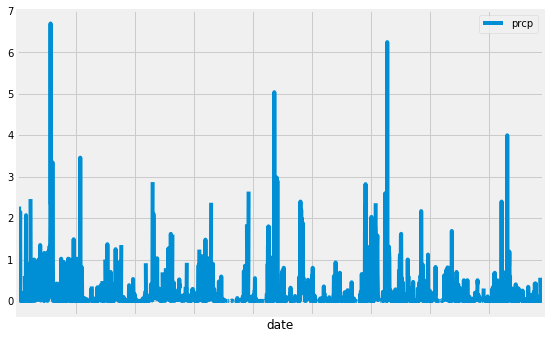

In [21]:
#df2.plot.bar(figsize=(10,5))
df2.plot(x_compat=True, figsize=(8,5))
plt.tight_layout()
plt.tick_params(axis='x',which='both',bottom=False,labelbottom=False)
plt.show()

In [1]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [22]:
df2.describe()

prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

In [23]:
st = session.query(Station)
for row2 in st:
    print(row2.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x1176fa518>, 'elevation': 3.0, 'latitude': 21.2716, 'name': 'WAIKIKI 717.2, HI US', 'id': 1, 'longitude': -157.8168, 'station': 'USC00519397'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x1177019e8>, 'elevation': 14.6, 'latitude': 21.4234, 'name': 'KANEOHE 838.1, HI US', 'id': 2, 'longitude': -157.8015, 'station': 'USC00513117'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x117701be0>, 'elevation': 7.0, 'latitude': 21.5213, 'name': 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 'id': 3, 'longitude': -157.8374, 'station': 'USC00514830'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x117701438>, 'elevation': 11.9, 'latitude': 21.3934, 'name': 'PEARL CITY, HI US', 'id': 4, 'longitude': -157.9751, 'station': 'USC00517948'}
{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x117701940>, 'elevation': 306.6, 'latitude': 21.4992, 'name':

In [24]:
session.query(func.count(Station.station)).all()


[(9)]

In [25]:
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [27]:
## date_point was calculated earlier as last 12 months from the max date
stmt = session.query(Measurement).filter(Measurement.date >= date_point).\
filter(Measurement.station == 'USC00519281').statement
df3 = pd.read_sql_query(stmt, session.bind)
df3.head(2)

id      station        date  prcp  tobs
0  14608  USC00519281  2016-08-23  1.79  77.0
1  14609  USC00519281  2016-08-24  2.15  77.0

In [28]:
df4 = df3[['date', 'tobs']]
df4.set_index('date', inplace = True)
df4.sort_values(by=['date'], inplace = True)

/Users/ahmar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


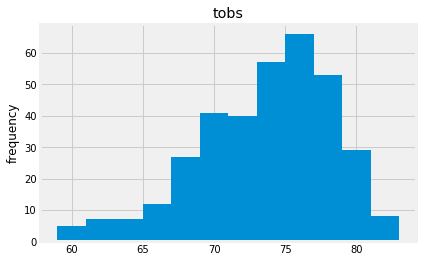

In [29]:
df4.hist(bins=12)
plt.ylabel('frequency')
plt.show()

In [92]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


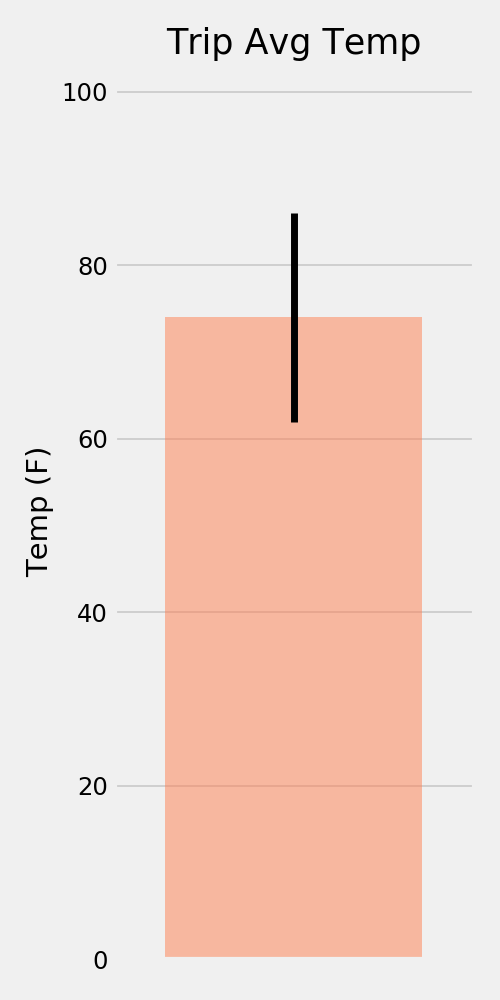

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [19]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


tmin       tavg  tmax
date                             
2018-01-01  62.0  69.153846  77.0
2018-01-02  60.0  69.396226  77.0
2018-01-03  62.0  68.909091  77.0
2018-01-04  58.0  70.000000  76.0
2018-01-05  56.0  67.964286  76.0

<IPython.core.display.Javascript object>


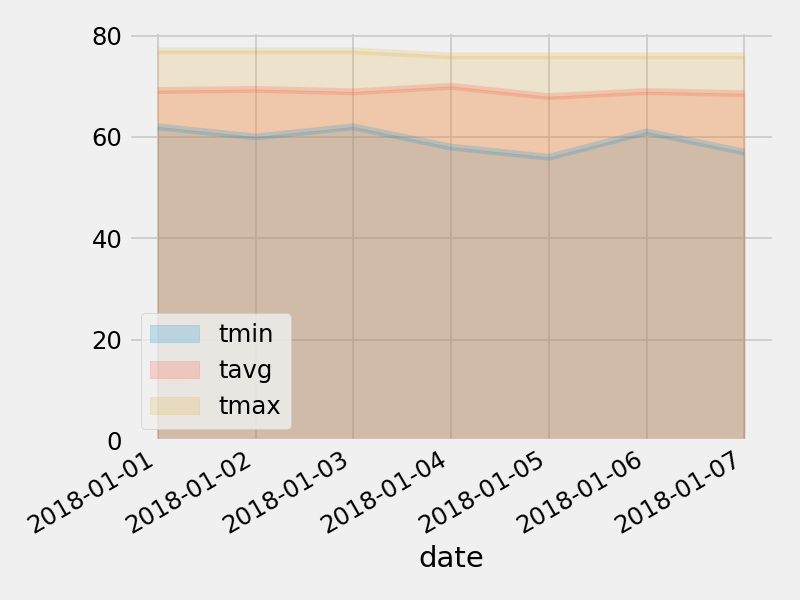

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
